<a href="https://www.kaggle.com/code/rajatraj0502/nuclear-explosions-data?scriptVersionId=138516385" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nuclear-explosions-data/nuclear_explosions.csv


In [2]:
import pandas as pd
import zipfile


# Load the data
df = pd.read_csv('/kaggle/input/nuclear-explosions-data/nuclear_explosions.csv')
df.head()


,WEAPON SOURCE COUNTRY,WEAPON DEPLOYMENT LOCATION,Data.Source,Location.Cordinates.Latitude,Location.Cordinates.Longitude,Data.Magnitude.Body,Data.Magnitude.Surface,Location.Cordinates.Depth,Data.Yeild.Lower,Data.Yeild.Upper,Data.Purpose,Data.Name,Data.Type,Date.Day,Date.Month,Date.Year
0,USA,Alamogordo,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,Wr,Trinity,Tower,16,7,1945
1,USA,Hiroshima,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,Combat,Littleboy,Airdrop,5,8,1945
2,USA,Nagasaki,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,Combat,Fatman,Airdrop,9,8,1945
3,USA,Bikini,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,We,Able,Airdrop,30,6,1946
4,USA,Bikini,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,We,Baker,Uw,24,7,1946


In [3]:
# Number of unique countries that have conducted nuclear tests
unique_countries = df['WEAPON SOURCE COUNTRY'].nunique()

# Number of tests conducted by each country
tests_by_country = df['WEAPON SOURCE COUNTRY'].value_counts()

unique_countries, tests_by_country


(7,
 USA       1031
 USSR       714
 FRANCE     208
 UK          45
 CHINA       43
 INDIA        3
 PAKIST       2
 Name: WEAPON SOURCE COUNTRY, dtype: int64)

In [4]:
# Distribution of the purpose of detonations
purpose_distribution = df['Data.Purpose'].value_counts()

purpose_distribution


Wr         1490
We          181
Pne         153
Se           71
Fms          33
Pne:Plo      27
Sam          25
Wr/Se        11
Pne:V         7
Wr/Sam        6
Wr/Fms        6
Sb            5
Transp        4
We/Sam        3
Wr/Pne        3
We/Wr         3
Wr/F/Sa       2
Fms/Wr        2
Wr/We         2
Se/Wr         2
Pne/Wr        2
Combat        2
Wr/P/Sa       1
Nan           1
Me            1
Wr/P/S        1
Wr/F/S        1
Wr/We/S       1
Name: Data.Purpose, dtype: int64

In [5]:
# Year-wise distribution of tests
tests_by_year = df['Date.Year'].value_counts().sort_index()

tests_by_year


1945      3
1946      2
1948      3
1949      1
1951     18
1952     11
1953     18
1954     16
1955     24
1956     33
1957     55
1958    116
1960      3
1961     71
1962    177
1963     50
1964     60
1965     58
1966     76
1967     64
1968     77
1969     67
1970     64
1971     53
1972     56
1973     48
1974     55
1975     44
1976     51
1977     54
1978     66
1979     57
1980     54
1981     50
1982     49
1983     54
1984     57
1985     36
1986     23
1987     47
1988     40
1989     28
1990     18
1991     14
1992      8
1993      1
1994      2
1995      7
1996      3
1998      4
Name: Date.Year, dtype: int64

In [6]:
# Average yield (lower and upper estimates) of the explosions
average_yield_lower = df['Data.Yeild.Lower'].mean()
average_yield_upper = df['Data.Yeild.Upper'].mean()

average_yield_lower, average_yield_upper


(208.44452820136854, 323.4310208699902)

In [7]:
# Distribution of deployment methods
deployment_methods = df['Data.Type'].value_counts()

deployment_methods


Shaft       1015
Tunnel       310
Atmosph      184
Shaft/Gr      85
Airdrop       78
Tower         75
Surface       62
Balloon       60
Shaft/Lg      56
Barge         40
Ug            31
Gallery       13
Rocket        12
Crater         9
Uw             8
Space          4
Ship           1
Watersur       1
Water Su       1
Mine           1
Name: Data.Type, dtype: int64

In [8]:
# Yearly frequency of nuclear tests
yearly_frequency = df.groupby('Date.Year').size()

yearly_frequency


Date.Year
1945      3
1946      2
1948      3
1949      1
1951     18
1952     11
1953     18
1954     16
1955     24
1956     33
1957     55
1958    116
1960      3
1961     71
1962    177
1963     50
1964     60
1965     58
1966     76
1967     64
1968     77
1969     67
1970     64
1971     53
1972     56
1973     48
1974     55
1975     44
1976     51
1977     54
1978     66
1979     57
1980     54
1981     50
1982     49
1983     54
1984     57
1985     36
1986     23
1987     47
1988     40
1989     28
1990     18
1991     14
1992      8
1993      1
1994      2
1995      7
1996      3
1998      4
dtype: int64

In [9]:
# Yearly average yield of nuclear tests (lower and upper estimates)
yearly_yield_lower = df.groupby('Date.Year')['Data.Yeild.Lower'].mean()
yearly_yield_upper = df.groupby('Date.Year')['Data.Yeild.Upper'].mean()

yearly_yield_lower, yearly_yield_upper


(Date.Year
 1945      19.000000
 1946      21.000000
 1948      34.666667
 1949      22.000000
 1951      32.800000
 1952    1002.636364
 1953      39.483333
 1954    3020.114375
 1955      86.041667
 1956     693.953939
 1957     175.258918
 1958     489.457097
 1960       0.000000
 1961    1172.578676
 1962     850.647621
 1963       6.788000
 1964       4.604950
 1965       7.565328
 1966      37.522197
 1967      63.851734
 1968      78.789468
 1969      72.994179
 1970      81.932953
 1971      11.555415
 1972      10.880464
 1973      47.539667
 1974      34.043818
 1975      34.899091
 1976      78.098294
 1977       4.994852
 1978       7.350833
 1979       6.575807
 1980      10.065111
 1981       4.526220
 1982      11.571612
 1983       5.907667
 1984       6.430035
 1985       6.416833
 1986      11.652174
 1987       5.704574
 1988       2.612700
 1989       5.714464
 1990       8.055556
 1991       5.714286
 1992      85.125000
 1993      40.000000
 1994      30.000000
 1

In [10]:
# Correlation between yield and depth of nuclear tests
correlation_lower = df['Data.Yeild.Lower'].corr(df['Location.Cordinates.Depth'])
correlation_upper = df['Data.Yeild.Upper'].corr(df['Location.Cordinates.Depth'])

correlation_lower, correlation_upper


(-0.022987588431533625, -0.01557866494322322)

In [11]:
# Number of tests conducted by the USA and the USSR over time
tests_USA = df[df['WEAPON SOURCE COUNTRY'] == 'USA'].groupby('Date.Year').size()
tests_USSR = df[df['WEAPON SOURCE COUNTRY'] == 'USSR'].groupby('Date.Year').size()

tests_USA, tests_USSR


(Date.Year
 1945     3
 1946     2
 1948     3
 1951    16
 1952    10
 1953    11
 1954     6
 1955    18
 1956    18
 1957    32
 1958    77
 1961    10
 1962    95
 1963    47
 1964    45
 1965    38
 1966    48
 1967    42
 1968    56
 1969    46
 1970    39
 1971    24
 1972    27
 1973    24
 1974    22
 1975    22
 1976    20
 1977    20
 1978    19
 1979    15
 1980    14
 1981    16
 1982    18
 1983    18
 1984    18
 1985    17
 1986    14
 1987    14
 1988    15
 1989    11
 1990     8
 1991     7
 1992     6
 dtype: int64,
 Date.Year
 1949     1
 1951     2
 1953     5
 1954    10
 1955     6
 1956     9
 1957    16
 1958    34
 1961    59
 1962    79
 1964     9
 1965    14
 1966    18
 1967    17
 1968    17
 1969    19
 1970    16
 1971    23
 1972    23
 1973    17
 1974    21
 1975    19
 1976    21
 1977    24
 1978    31
 1979    31
 1980    24
 1981    21
 1982    19
 1983    25
 1984    27
 1985    10
 1987    23
 1988    16
 1989     7
 1990     1
 dtype: int64)

In [12]:
# Average yield of tests conducted by the USA and the USSR over time
yield_USA_lower = df[df['WEAPON SOURCE COUNTRY'] == 'USA'].groupby('Date.Year')['Data.Yeild.Lower'].mean()
yield_USA_upper = df[df['WEAPON SOURCE COUNTRY'] == 'USA'].groupby('Date.Year')['Data.Yeild.Upper'].mean()

yield_USSR_lower = df[df['WEAPON SOURCE COUNTRY'] == 'USSR'].groupby('Date.Year')['Data.Yeild.Lower'].mean()
yield_USSR_upper = df[df['WEAPON SOURCE COUNTRY'] == 'USSR'].groupby('Date.Year')['Data.Yeild.Upper'].mean()

yield_USA_lower, yield_USA_upper, yield_USSR_lower, yield_USSR_upper


(Date.Year
 1945      19.000000
 1946      21.000000
 1948      34.666667
 1951      31.900000
 1952    1100.400000
 1953      22.945455
 1954    8033.333333
 1955      10.944444
 1956    1156.676667
 1957      10.757516
 1958     463.329392
 1961       1.965000
 1962     381.703684
 1963       7.221277
 1964       3.873156
 1965       5.362632
 1966      33.907917
 1967      16.695238
 1968      52.362500
 1969      34.552174
 1970      38.369231
 1971       6.791667
 1972       1.296296
 1973      15.958333
 1974       3.636364
 1975      51.818182
 1976      89.000000
 1977       8.000000
 1978       8.421053
 1979      18.666667
 1980      15.214286
 1981       6.250000
 1982      23.166667
 1983      10.166667
 1984       7.777778
 1985       9.411765
 1986      17.714286
 1987       7.857143
 1988       1.333333
 1989       9.090909
 1990       7.500000
 1991      11.428571
 1992       3.333333
 Name: Data.Yeild.Lower, dtype: float64,
 Date.Year
 1945      19.000000
 1946      21

In [13]:
# Cumulative number of tests conducted by the USA and the USSR over time
cumulative_tests_USA = tests_USA.cumsum()
cumulative_tests_USSR = tests_USSR.cumsum()

cumulative_tests_USA, cumulative_tests_USSR


(Date.Year
 1945       3
 1946       5
 1948       8
 1951      24
 1952      34
 1953      45
 1954      51
 1955      69
 1956      87
 1957     119
 1958     196
 1961     206
 1962     301
 1963     348
 1964     393
 1965     431
 1966     479
 1967     521
 1968     577
 1969     623
 1970     662
 1971     686
 1972     713
 1973     737
 1974     759
 1975     781
 1976     801
 1977     821
 1978     840
 1979     855
 1980     869
 1981     885
 1982     903
 1983     921
 1984     939
 1985     956
 1986     970
 1987     984
 1988     999
 1989    1010
 1990    1018
 1991    1025
 1992    1031
 dtype: int64,
 Date.Year
 1949      1
 1951      3
 1953      8
 1954     18
 1955     24
 1956     33
 1957     49
 1958     83
 1961    142
 1962    221
 1964    230
 1965    244
 1966    262
 1967    279
 1968    296
 1969    315
 1970    331
 1971    354
 1972    377
 1973    394
 1974    415
 1975    434
 1976    455
 1977    479
 1978    510
 1979    541
 1980    565
 1981    5

In [14]:
# Direct comparison of the average yield of tests conducted by the USA and the USSR over time
yield_comparison_lower = pd.DataFrame({
    'USA': yield_USA_lower,
    'USSR': yield_USSR_lower
})

yield_comparison_upper = pd.DataFrame({
    'USA': yield_USA_upper,
    'USSR': yield_USSR_upper
})

yield_comparison_lower, yield_comparison_upper


(                   USA         USSR
 Date.Year                          
 1945         19.000000          NaN
 1946         21.000000          NaN
 1948         34.666667          NaN
 1949               NaN    22.000000
 1951         31.900000    40.000000
 1952       1100.400000          NaN
 1953         22.945455    88.060000
 1954       8033.333333    12.183000
 1955         10.944444   311.333333
 1956       1156.676667   219.533333
 1957         10.757516   390.187500
 1958        463.329392   477.990000
 1961          1.965000  1410.736203
 1962        381.703684  1446.497203
 1963          7.221277          NaN
 1964          3.873156     8.889444
 1965          5.362632    12.857786
 1966         33.907917    35.561500
 1967         16.695238     4.135941
 1968         52.362500     7.911118
 1969         34.552174    14.537368
 1970         38.369231    21.706812
 1971          6.791667    18.888565
 1972          1.296296    17.230696
 1973         15.958333   111.700235
 

In [15]:
# Frequency of "Wr" (Weapons related) tests over time
wr_tests = df[df['Data.Purpose'] == 'Wr'].groupby('Date.Year').size()

# Frequency of "We" (Weapons effects tests) tests over time
we_tests = df[df['Data.Purpose'] == 'We'].groupby('Date.Year').size()

# Frequency of "Pne" (Peaceful nuclear explosions) tests over time
pne_tests = df[df['Data.Purpose'] == 'Pne'].groupby('Date.Year').size()

wr_tests, we_tests, pne_tests


(Date.Year
 1945      1
 1948      3
 1949      1
 1951     16
 1952      8
 1953     17
 1954     15
 1955     15
 1956     30
 1957     42
 1958     80
 1960      1
 1961     57
 1962    147
 1963     39
 1964     42
 1965     41
 1966     43
 1967     46
 1968     52
 1969     48
 1970     45
 1971     35
 1972     34
 1973     35
 1974     36
 1975     33
 1976     44
 1977     41
 1978     40
 1979     36
 1980     39
 1981     41
 1982     34
 1983     35
 1984     39
 1985     30
 1986     22
 1987     29
 1988     27
 1989     22
 1990     15
 1991     12
 1992      5
 1993      1
 1994      2
 1995      7
 1996      3
 1998      4
 dtype: int64,
 Date.Year
 1946     2
 1951     2
 1952     3
 1953     1
 1955     6
 1956     2
 1957     3
 1958    10
 1960     2
 1961     7
 1962    18
 1964     2
 1965     6
 1966    14
 1967     5
 1968     8
 1969     4
 1970     5
 1971     5
 1972     7
 1973     3
 1974     7
 1975     4
 1976     2
 1977     1
 1978     9
 1979     6
 1

In [16]:
# Average yield of "Wr" (Weapons related) tests over time
wr_yield_lower = df[df['Data.Purpose'] == 'Wr'].groupby('Date.Year')['Data.Yeild.Lower'].mean()
wr_yield_upper = df[df['Data.Purpose'] == 'Wr'].groupby('Date.Year')['Data.Yeild.Upper'].mean()

# Average yield of "We" (Weapons effects tests) tests over time
we_yield_lower = df[df['Data.Purpose'] == 'We'].groupby('Date.Year')['Data.Yeild.Lower'].mean()
we_yield_upper = df[df['Data.Purpose'] == 'We'].groupby('Date.Year')['Data.Yeild.Upper'].mean()

# Average yield of "Pne" (Peaceful nuclear explosions) tests over time
pne_yield_lower = df[df['Data.Purpose'] == 'Pne'].groupby('Date.Year')['Data.Yeild.Lower'].mean()
pne_yield_upper = df[df['Data.Purpose'] == 'Pne'].groupby('Date.Year')['Data.Yeild.Upper'].mean()

wr_yield_lower, wr_yield_upper, we_yield_lower, we_yield_upper, pne_yield_lower, pne_yield_upper


(Date.Year
 1945      21.000000
 1948      34.666667
 1949      22.000000
 1951      36.750000
 1952    1375.250000
 1953      40.217647
 1954    3218.788667
 1955     133.633333
 1956     763.289333
 1957     228.198583
 1958     612.685600
 1960       0.000000
 1961    1459.190912
 1962    1004.628041
 1963       8.394872
 1964       3.290500
 1965       4.304512
 1966      58.474512
 1967      86.630587
 1968     112.913538
 1969      99.695917
 1970     112.748978
 1971      11.600143
 1972      12.235382
 1973      58.285800
 1974      50.555750
 1975      46.060788
 1976      88.863909
 1977       5.366098
 1978       6.150200
 1979       8.333639
 1980      12.487538
 1981       3.902683
 1982      12.941382
 1983       6.371657
 1984       6.666846
 1985       7.333500
 1986      12.181818
 1987       6.896828
 1988       1.518704
 1989       7.272909
 1990       9.666667
 1991       6.666667
 1992     136.200000
 1993      40.000000
 1994      30.000000
 1995      12.857143
 1

In [17]:
# Correlation between yield and body wave magnitude of nuclear tests
correlation_yield_body_lower = df['Data.Yeild.Lower'].corr(df['Data.Magnitude.Body'])
correlation_yield_body_upper = df['Data.Yeild.Upper'].corr(df['Data.Magnitude.Body'])

correlation_yield_body_lower, correlation_yield_body_upper


(-0.08202334566477965, -0.04178425706056113)

In [18]:
# Correlation between yield and surface wave magnitude of nuclear tests
correlation_yield_surface_lower = df['Data.Yeild.Lower'].corr(df['Data.Magnitude.Surface'])
correlation_yield_surface_upper = df['Data.Yeild.Upper'].corr(df['Data.Magnitude.Surface'])

correlation_yield_surface_lower, correlation_yield_surface_upper


(-0.02741996625795533, 0.020248836663835576)

In [19]:
# Frequency of "Shaft" tests over time
shaft_tests = df[df['Data.Type'] == 'Shaft'].groupby('Date.Year').size()

# Frequency of "Tunnel" tests over time
tunnel_tests = df[df['Data.Type'] == 'Tunnel'].groupby('Date.Year').size()

# Frequency of "Atmosph" (Atmospheric) tests over time
atmosph_tests = df[df['Data.Type'] == 'Atmosph'].groupby('Date.Year').size()

shaft_tests, tunnel_tests, atmosph_tests


(Date.Year
 1957     3
 1958     6
 1961     7
 1962    52
 1963    42
 1964    47
 1965    40
 1966    49
 1967    44
 1968    55
 1969    50
 1970    40
 1971    34
 1972    38
 1973    34
 1974    35
 1975    30
 1976    31
 1977    33
 1978    34
 1979    34
 1980    29
 1981    29
 1982    30
 1983    30
 1984    39
 1985    22
 1986    14
 1987    26
 1988    23
 1989    16
 1990     8
 1991     7
 1992     4
 dtype: int64,
 Date.Year
 1957     2
 1958     9
 1961     4
 1962     5
 1963     1
 1964     9
 1965    12
 1966    17
 1967    15
 1968    15
 1969    15
 1970    15
 1971    13
 1972    12
 1973     7
 1974    10
 1975    11
 1976    11
 1977    11
 1978    18
 1979    12
 1980    12
 1981     9
 1982     8
 1983    14
 1984     8
 1985     6
 1986     1
 1987    12
 1988     8
 1989     3
 1990     2
 1991     1
 1992     2
 dtype: int64,
 Date.Year
 1953     5
 1954     7
 1955     2
 1956     5
 1957    13
 1958    34
 1961    48
 1962    63
 1974     1
 1976     2
 

In [20]:
# Average yield of "Shaft" tests over time
shaft_yield_lower = df[df['Data.Type'] == 'Shaft'].groupby('Date.Year')['Data.Yeild.Lower'].mean()
shaft_yield_upper = df[df['Data.Type'] == 'Shaft'].groupby('Date.Year')['Data.Yeild.Upper'].mean()

# Average yield of "Tunnel" tests over time
tunnel_yield_lower = df[df['Data.Type'] == 'Tunnel'].groupby('Date.Year')['Data.Yeild.Lower'].mean()
tunnel_yield_upper = df[df['Data.Type'] == 'Tunnel'].groupby('Date.Year')['Data.Yeild.Upper'].mean()

# Average yield of "Atmosph" (Atmospheric) tests over time
atmosph_yield_lower = df[df['Data.Type'] == 'Atmosph'].groupby('Date.Year')['Data.Yeild.Lower'].mean()
atmosph_yield_upper = df[df['Data.Type'] == 'Atmosph'].groupby('Date.Year')['Data.Yeild.Upper'].mean()

shaft_yield_lower, shaft_yield_upper, tunnel_yield_lower, tunnel_yield_upper, atmosph_yield_lower, atmosph_yield_upper


(Date.Year
 1957     0.000000
 1958     0.010333
 1961     2.414286
 1962     6.385962
 1963     8.007143
 1964     3.708340
 1965     9.262000
 1966    32.993490
 1967    16.170500
 1968    54.061473
 1969    36.192020
 1970    41.342550
 1971     9.329471
 1972    10.557947
 1973    62.114765
 1974    47.674429
 1975    50.518400
 1976    62.355000
 1977     8.173152
 1978    13.210118
 1979    11.015059
 1980    11.845034
 1981     7.803621
 1982    18.800100
 1983     9.966767
 1984     8.841179
 1985    10.500136
 1986    19.142857
 1987     7.619500
 1988     4.500174
 1989    10.000187
 1990    10.000000
 1991    11.428571
 1992     5.000000
 Name: Data.Yeild.Lower, dtype: float64,
 Date.Year
 1957      0.000000
 1958      0.010333
 1961     13.842857
 1962     23.309038
 1963     37.769048
 1964     36.899830
 1965     48.262000
 1966     66.258776
 1967     57.534091
 1968    123.516000
 1969    123.392000
 1970    327.967500
 1971    188.152941
 1972     33.189474
 1973    40

In [21]:
pip install pandas folium


Note: you may need to restart the kernel to use updated packages.


In [22]:
!pip install geopandas matplotlib folium


In [23]:
print(df.columns)


Index(['WEAPON SOURCE COUNTRY', 'WEAPON DEPLOYMENT LOCATION', 'Data.Source',
       'Location.Cordinates.Latitude', 'Location.Cordinates.Longitude',
       'Data.Magnitude.Body', 'Data.Magnitude.Surface',
       'Location.Cordinates.Depth', 'Data.Yeild.Lower', 'Data.Yeild.Upper',
       'Data.Purpose', 'Data.Name', 'Data.Type', 'Date.Day', 'Date.Month',
       'Date.Year'],
      dtype='object')


In [24]:
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

# Create a GeoDataFrame from your data
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df['Location.Cordinates.Longitude'], df['Location.Cordinates.Latitude']))

# Create a map centered around the coordinates of interest
m = folium.Map(location=[0, 0], zoom_start=2)

# Add the points from your GeoDataFrame to the map
for idx, row in gdf.iterrows():
    folium.Marker([row['Location.Cordinates.Latitude'], row['Location.Cordinates.Longitude']], 
                  popup=f"{row['Data.Name']}, {row['Date.Year']}, Yield: {row['Data.Yeild.Lower']} - {row['Data.Yeild.Upper']} kt TNT").add_to(m)

# Display the map
m


In [25]:
# Descriptive statistics of the yield
yield_lower_stats = df['Data.Yeild.Lower'].describe()
yield_upper_stats = df['Data.Yeild.Upper'].describe()

yield_lower_stats, yield_upper_stats


(count     2046.000000
 mean       208.444528
 std       1641.962943
 min          0.000000
 25%          0.000000
 50%          0.001000
 75%         20.000000
 max      50000.000000
 Name: Data.Yeild.Lower, dtype: float64,
 count     2046.000000
 mean       323.431021
 std       2055.203066
 min          0.000000
 25%         18.250000
 50%         20.000000
 75%        150.000000
 max      50000.000000
 Name: Data.Yeild.Upper, dtype: float64)

In [26]:
# Mean yield over time
yield_lower_time = df.groupby('Date.Year')['Data.Yeild.Lower'].mean()
yield_upper_time = df.groupby('Date.Year')['Data.Yeild.Upper'].mean()

yield_lower_time, yield_upper_time


(Date.Year
 1945      19.000000
 1946      21.000000
 1948      34.666667
 1949      22.000000
 1951      32.800000
 1952    1002.636364
 1953      39.483333
 1954    3020.114375
 1955      86.041667
 1956     693.953939
 1957     175.258918
 1958     489.457097
 1960       0.000000
 1961    1172.578676
 1962     850.647621
 1963       6.788000
 1964       4.604950
 1965       7.565328
 1966      37.522197
 1967      63.851734
 1968      78.789468
 1969      72.994179
 1970      81.932953
 1971      11.555415
 1972      10.880464
 1973      47.539667
 1974      34.043818
 1975      34.899091
 1976      78.098294
 1977       4.994852
 1978       7.350833
 1979       6.575807
 1980      10.065111
 1981       4.526220
 1982      11.571612
 1983       5.907667
 1984       6.430035
 1985       6.416833
 1986      11.652174
 1987       5.704574
 1988       2.612700
 1989       5.714464
 1990       8.055556
 1991       5.714286
 1992      85.125000
 1993      40.000000
 1994      30.000000
 1

In [27]:
# Mean yield by country
yield_lower_country = df.groupby('WEAPON SOURCE COUNTRY')['Data.Yeild.Lower'].mean()
yield_upper_country = df.groupby('WEAPON SOURCE COUNTRY')['Data.Yeild.Upper'].mean()

yield_lower_country, yield_upper_country


(WEAPON SOURCE COUNTRY
 CHINA     391.930233
 FRANCE      1.057692
 INDIA       0.000000
 PAKIST      0.000000
 UK        186.635556
 USA       163.516426
 USSR      325.518864
 Name: Data.Yeild.Lower, dtype: float64,
 WEAPON SOURCE COUNTRY
 CHINA     602.930233
 FRANCE    103.413462
 INDIA      13.666667
 PAKIST     26.500000
 UK        240.177778
 USA       225.937476
 USSR      518.852004
 Name: Data.Yeild.Upper, dtype: float64)

In [28]:
# Descriptive statistics of the depth
depth_stats = df['Location.Cordinates.Depth'].describe()
depth_stats


count    2046.000000
mean       -0.490829
std        10.981072
min      -400.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.451000
Name: Location.Cordinates.Depth, dtype: float64

In [29]:
# Mean depth over time
depth_time = df.groupby('Date.Year')['Location.Cordinates.Depth'].mean()
depth_time


Date.Year
1945   -0.433333
1946   -0.085000
1948   -0.080000
1949    0.000000
1951   -0.225611
1952   -0.272909
1953   -0.223889
1954   -0.000375
1955   -0.578375
1956   -0.057909
1957   -0.226382
1958   -5.523431
1960   -0.033667
1961    0.014085
1962   -2.247571
1963    0.018000
1964    0.000000
1965    0.000000
1966    0.023026
1967    0.000000
1968    0.002597
1969    0.000000
1970    0.000000
1971    0.000000
1972    0.000000
1973    0.000000
1974    0.000000
1975    0.233409
1976    0.208078
1977    0.120093
1978    0.107030
1979    0.109088
1980    0.138537
1981    0.112220
1982    0.161939
1983    0.107500
1984    0.000000
1985    0.114528
1986    0.000000
1987    0.000000
1988    0.000000
1989    0.000000
1990    0.000000
1991    0.000000
1992    0.000000
1993    0.000000
1994    0.000000
1995    0.000000
1996    0.000000
1998    0.000000
Name: Location.Cordinates.Depth, dtype: float64

In [30]:
# Mean depth by country
depth_country = df.groupby('WEAPON SOURCE COUNTRY')['Location.Cordinates.Depth'].mean()
depth_country


WEAPON SOURCE COUNTRY
CHINA     0.000000
FRANCE   -0.000486
INDIA     0.000000
PAKIST    0.000000
UK        0.102733
USA      -0.978428
USSR      0.000000
Name: Location.Cordinates.Depth, dtype: float64

In [31]:
!pip install plotly


In [32]:
import plotly.express as px

# Create the 3D scatter plot
fig = px.scatter_3d(df, 
                    x='Data.Yeild.Upper', 
                    y='Location.Cordinates.Depth', 
                    z='Data.Magnitude.Surface', 
                    color='WEAPON SOURCE COUNTRY', 
                    hover_data=['Data.Name', 'Date.Year'], 
                    labels={
                        'Data.Yeild.Upper': 'Yield (Upper Estimate)',
                        'Location.Cordinates.Depth': 'Depth',
                        'Data.Magnitude.Surface': 'Surface Magnitude',
                        'WEAPON SOURCE COUNTRY': 'Country'
                    },
                    title='Nuclear Tests: Yield, Depth, and Magnitude')

# Show the plot
fig.show()


In [33]:
import plotly.express as px

# Create a subset of the data
df_subset = df[['WEAPON SOURCE COUNTRY', 'Data.Yeild.Lower', 'Data.Yeild.Upper', 'Data.Magnitude.Body', 'Data.Magnitude.Surface', 'Location.Cordinates.Depth']]

# Create the parallel coordinates plot
fig = px.parallel_coordinates(df_subset, color="Location.Cordinates.Depth",
                              labels={
                                  'WEAPON SOURCE COUNTRY': 'Country',
                                  'Data.Yeild.Lower': 'Yield (Lower Estimate)',
                                  'Data.Yeild.Upper': 'Yield (Upper Estimate)',
                                  'Data.Magnitude.Body': 'Body Magnitude',
                                  'Data.Magnitude.Surface': 'Surface Magnitude',
                                  'Location.Cordinates.Depth': 'Depth'
                              },
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=0)

# Show the plot
fig.show()


In [34]:
!pip install sklearn matplotlib seaborn


  Preparing metadata (setup.py) ... - \ done
  Created wheel for sklearn: filename=sklearn-0.0.post7-py3-none-any.whl size=2360 sha256=bd007e15f84443be9e59c5e120b62a18aafddd4beb6c368d6b4a06915fa15c79
  Stored in directory: /root/.cache/pip/wheels/c8/9c/85/72901eb50bc4bc6e3b2629378d172384ea3dfd19759c77fd2c
Successfully built sklearn


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5



<Axes: xlabel='Dimension 1', ylabel='Dimension 2'>

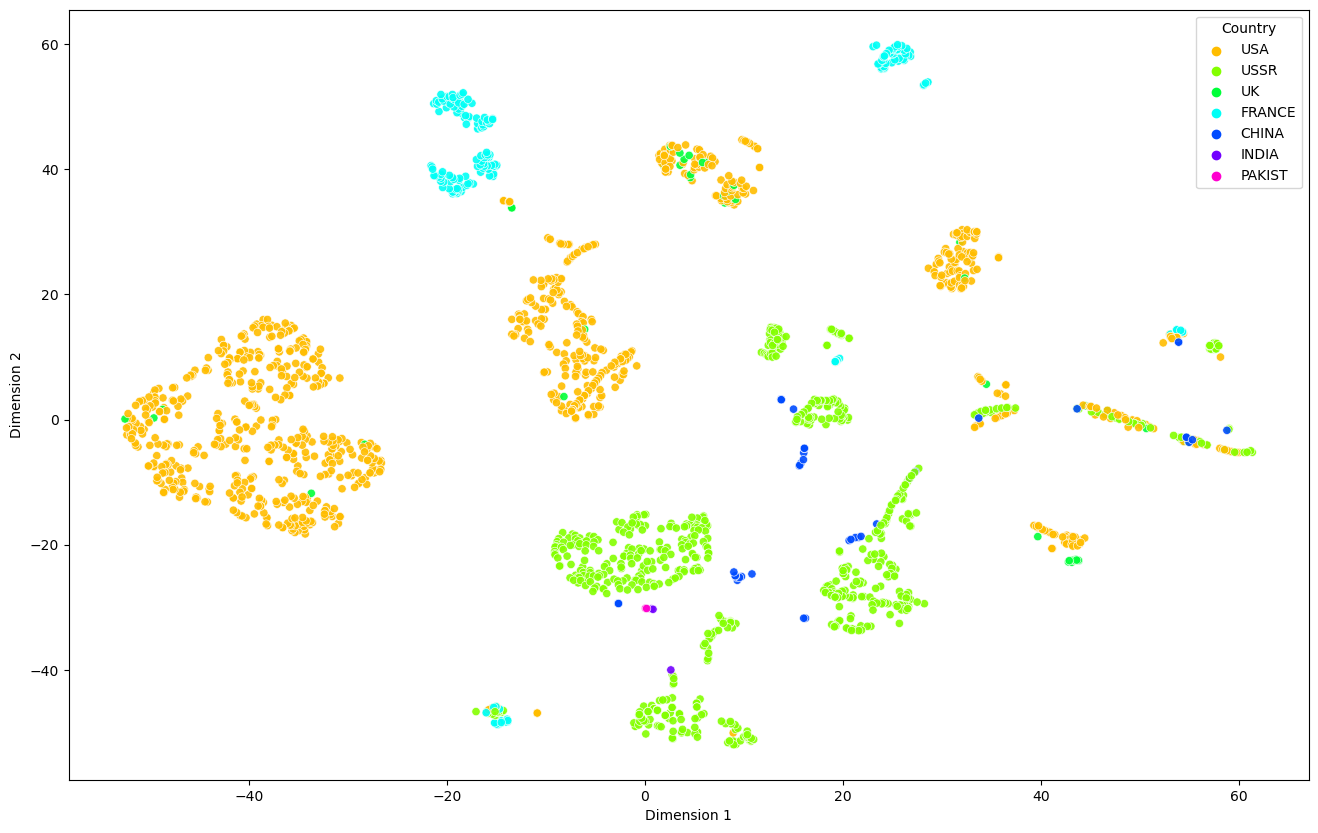

In [35]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for t-SNE
df_subset = df.select_dtypes(include=['float64', 'int64'])

# Fill missing values
df_subset.fillna(df_subset.mean(), inplace=True)

# Compute t-SNE
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(df_subset)

# Create a DataFrame with t-SNE results and country information
df_tsne = pd.DataFrame(data = tsne_results, columns = ['Dimension 1', 'Dimension 2'])
df_tsne['Country'] = df['WEAPON SOURCE COUNTRY']

# Plot t-SNE results with seaborn
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="Dimension 1", y="Dimension 2",
    hue="Country",
    palette=sns.color_palette("hsv", len(df_tsne['Country'].unique())),
    data=df_tsne,
    legend="full",
    alpha=0.9
)


In [36]:
!pip install networkx matplotlib


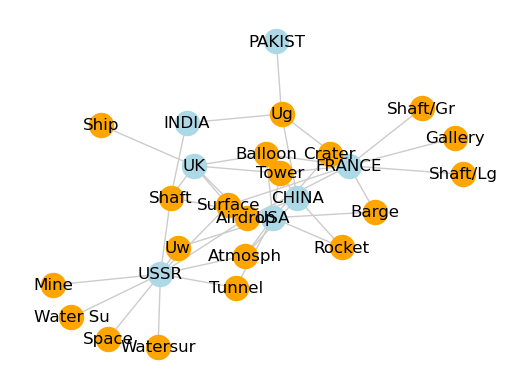

In [37]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new DataFrame with 'WEAPON SOURCE COUNTRY' and 'Data.Type' columns
df_network = df[['WEAPON SOURCE COUNTRY', 'Data.Type']]

# Create a new graph
G = nx.Graph()

# Add nodes with the 'Country' attribute
for index, row in df_network.iterrows():
    G.add_node(row['WEAPON SOURCE COUNTRY'], node_type='Country')
    G.add_node(row['Data.Type'], node_type='Deployment Method')

# Add edges between countries and deployment methods
for index, row in df_network.iterrows():
    G.add_edge(row['WEAPON SOURCE COUNTRY'], row['Data.Type'])

# Create a layout for our nodes 
layout = nx.spring_layout(G,iterations=50)

# Draw the nodes
nx.draw_networkx_nodes(G, layout, nodelist=[node for node in G.nodes() if G.nodes[node]['node_type'] == 'Country'], node_color='lightblue')
nx.draw_networkx_nodes(G, layout, nodelist=[node for node in G.nodes() if G.nodes[node]['node_type'] == 'Deployment Method'], node_color='orange')

# Draw the edges
nx.draw_networkx_edges(G, layout, width=1, edge_color="#cccccc")

# Draw the node labels
nx.draw_networkx_labels(G, layout)

# Show the plot
plt.axis('off')
plt.show()


In [38]:
!pip install plotly


In [39]:
import plotly.graph_objects as go

# Count the number of tests for each country and deployment method
df_sankey = df.groupby(['WEAPON SOURCE COUNTRY', 'Data.Type']).size().reset_index(name='count')

# Create lists for the source, target, and value attributes of the Sankey diagram
source = df_sankey['WEAPON SOURCE COUNTRY'].apply(lambda x: df_sankey['WEAPON SOURCE COUNTRY'].unique().tolist().index(x)).tolist()
target = df_sankey['Data.Type'].apply(lambda x: df_sankey['Data.Type'].unique().tolist().index(x) + len(df_sankey['WEAPON SOURCE COUNTRY'].unique())).tolist()
value = df_sankey['count'].tolist()

# Create a list for the labels (country and deployment method names)
label = df_sankey['WEAPON SOURCE COUNTRY'].unique().tolist() + df_sankey['Data.Type'].unique().tolist()

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(node = dict(pad = 15, thickness = 20, line = dict(color = "black", width = 0.5), label = label, color = "blue"),
                                  link = dict(source = source, target = target, value = value))])

# Update the layout
fig.update_layout(title_text="Flow of Nuclear Tests from Countries to Deployment Methods", font_size=10)

# Show the plot
fig.show()


In [40]:
!pip install wordcloud matplotlib


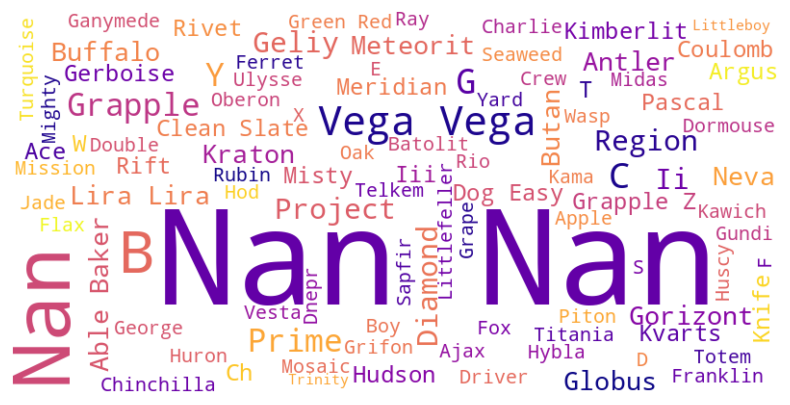

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all nuclear test names into a single string
text = ' '.join(df['Data.Name'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma', max_words=100).generate(text)

# Create the plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Show the plot
plt.show()


In [42]:
!pip install scikit-learn pandas


In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import pandas as pd

# Select the columns
df_ml = df[['WEAPON SOURCE COUNTRY', 'Data.Type', 'Location.Cordinates.Depth', 'Data.Yeild.Lower']]

# Drop missing values
df_ml = df_ml.dropna()

# One-hot encode the categorical variables
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df_ml[['WEAPON SOURCE COUNTRY', 'Data.Type']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['WEAPON SOURCE COUNTRY', 'Data.Type']))

# Concatenate the encoded features and the depth
X = pd.concat([encoded_df, df_ml['Location.Cordinates.Depth'].reset_index(drop=True)], axis=1)
y = df_ml['Data.Yeild.Lower']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict the yield for the test set
y_pred = model.predict(X_test)

# Calculate the root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('Root Mean Squared Error:', rmse)


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Root Mean Squared Error: 1124.2644727646496


In [44]:
!pip install scikit-learn matplotlib


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



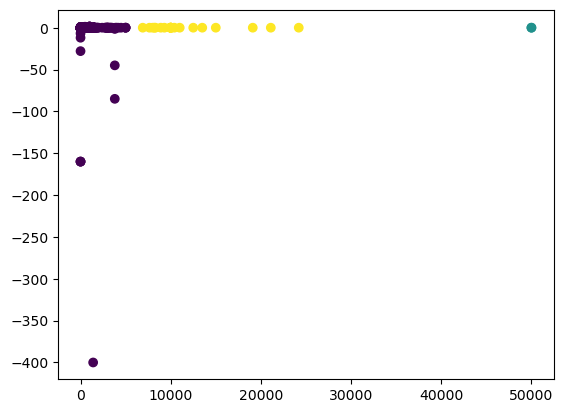

In [45]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select the columns
df_cluster = df[['Data.Yeild.Upper', 'Location.Cordinates.Depth']]

# Drop missing values
df_cluster = df_cluster.dropna()

# Create the KMeans model
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the model
kmeans.fit(df_cluster)

# Get the cluster assignments for each data point
clusters = kmeans.predict(df_cluster)

# Create the plot
plt.scatter(df_cluster['Data.Yeild.Upper'], df_cluster['Location.Cordinates.Depth'], c=clusters, cmap='viridis')

# Show the plot
plt.show()


In [46]:
!pip install nltk textblob


In [47]:
from textblob import TextBlob

# Apply sentiment analysis to the 'Data.Name' field
df['sentiment'] = df['Data.Name'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Print the average sentiment
print('Average sentiment:', df['sentiment'].mean())


Average sentiment: 0.003995601173020528


In [48]:
!pip install geopandas matplotlib


/tmp/ipykernel_20/3018389261.py:5: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



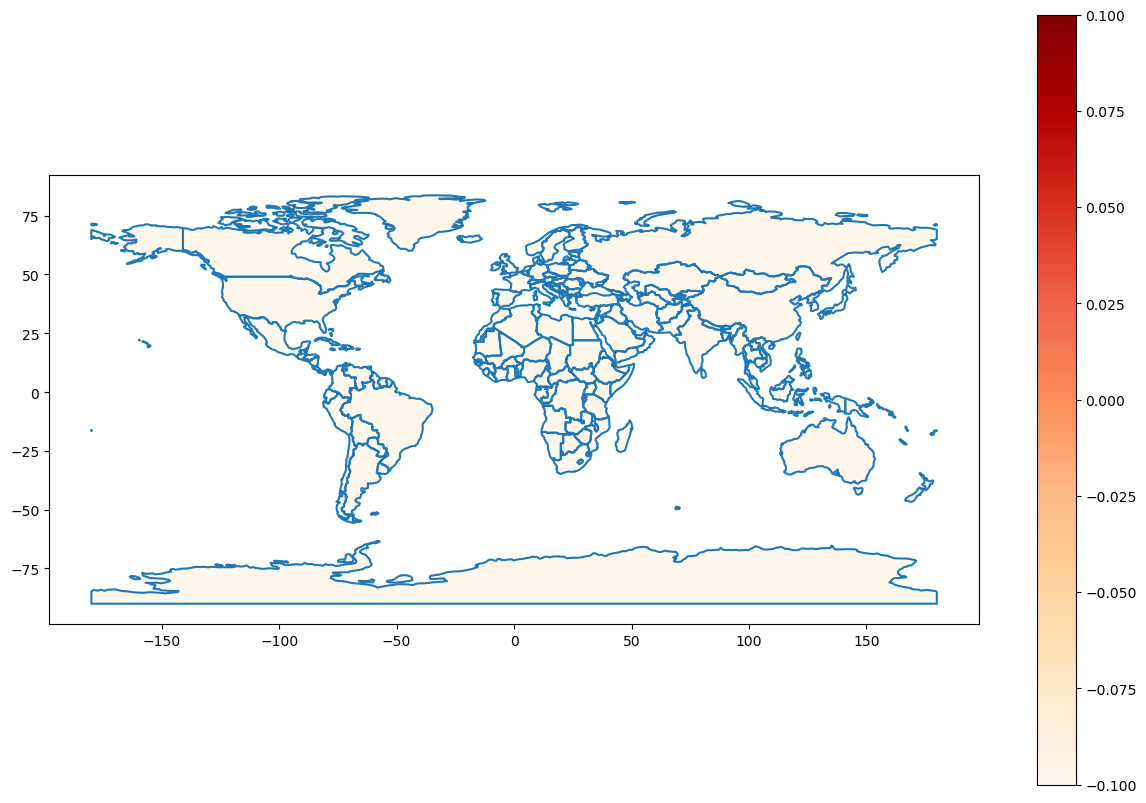

In [49]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load a GeoDataFrame with the boundaries of all countries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Count the number of nuclear tests for each country
df_country_counts = df['WEAPON SOURCE COUNTRY'].value_counts().reset_index()
df_country_counts.columns = ['Country', 'Count']

# Merge the GeoDataFrame with the counts DataFrame
world = world.merge(df_country_counts, how='left', left_on='name', right_on='Country')

# Replace missing values with 0
world['Count'] = world['Count'].fillna(0)

# Create the plot
fig, ax = plt.subplots(figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='Count', ax=ax, legend=True, cmap='OrRd')

# Show the plot
plt.show()


In [50]:
!pip install plotly


In [51]:
import plotly.express as px

# Create the 3D scatter plot
fig = px.scatter_3d(df, x='Data.Yeild.Lower', y='Data.Yeild.Upper', z='Location.Cordinates.Depth',
                    color='WEAPON SOURCE COUNTRY', symbol='Data.Type',
                    title='3D Scatter Plot of Nuclear Test Yields and Depths',
                    labels={'Data.Yeild.Lower': 'Yield (Lower Estimate)',
                            'Data.Yeild.Upper': 'Yield (Upper Estimate)',
                            'Location.Cordinates.Depth': 'Depth'})

# Show the plot
fig.show()


In [52]:
!pip install seaborn


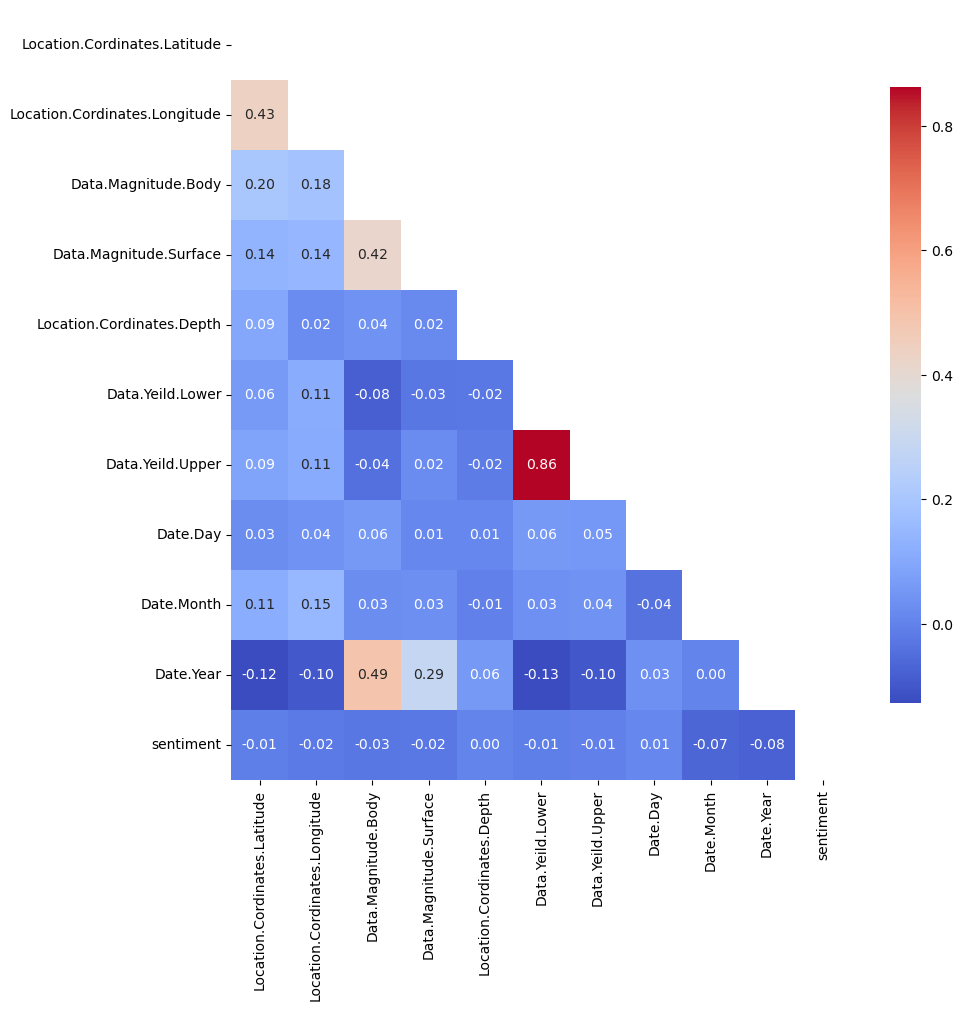

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = df_numeric.corr()

# Create a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create the plot
plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={"shrink": .8})

# Show the plot
plt.show()


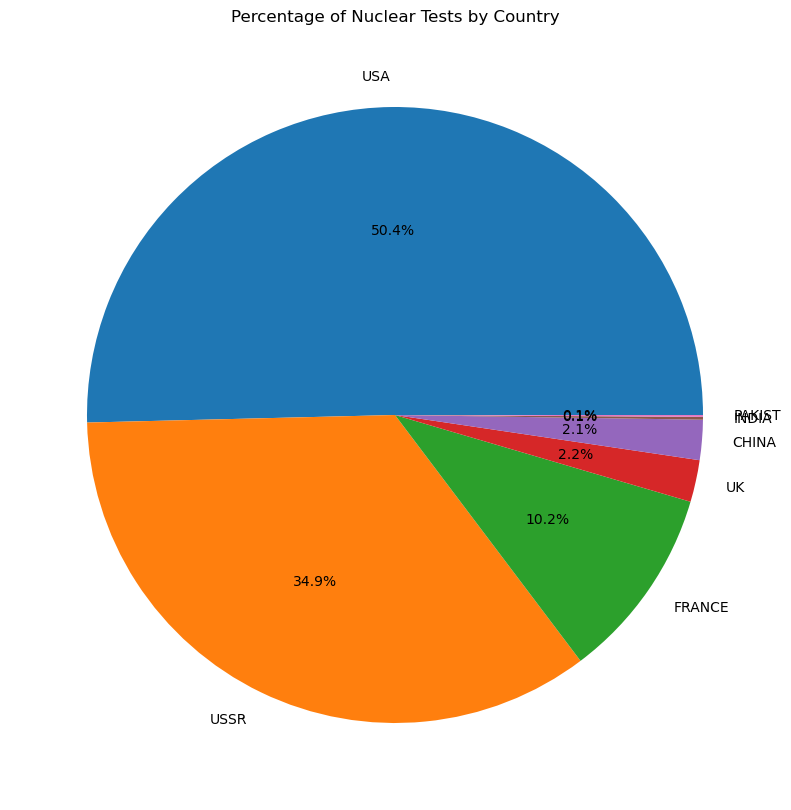

In [54]:
import matplotlib.pyplot as plt

# Count the number of nuclear tests for each country
df_country_counts = df['WEAPON SOURCE COUNTRY'].value_counts()

# Create the plot
plt.figure(figsize=(10, 10))
plt.pie(df_country_counts, labels=df_country_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Nuclear Tests by Country')

# Show the plot
plt.show()


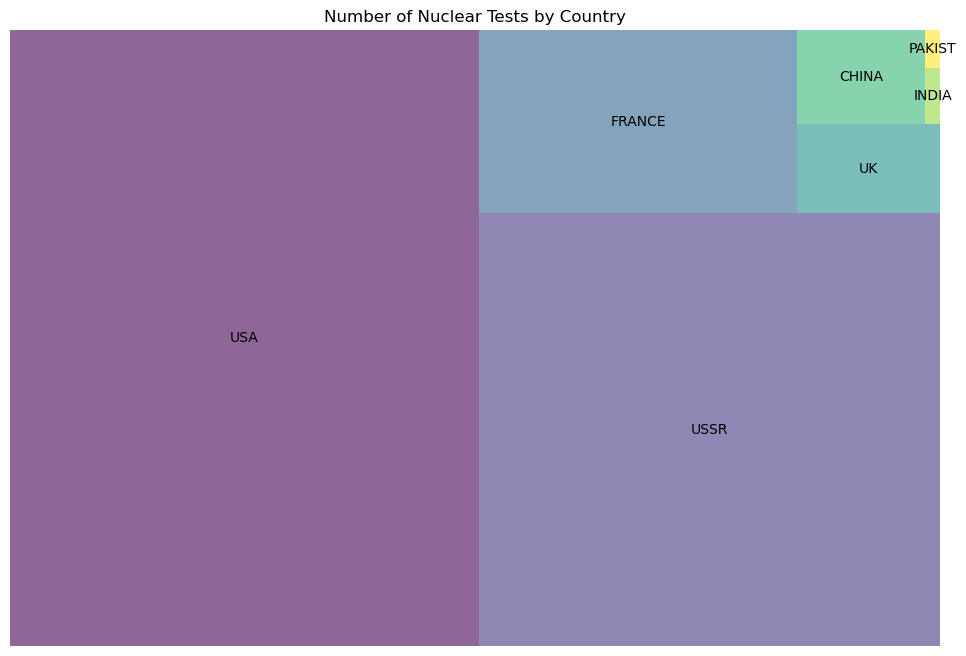

In [55]:
import squarify
import matplotlib.pyplot as plt

# Count the number of nuclear tests for each country
df_country_counts = df['WEAPON SOURCE COUNTRY'].value_counts()

# Create a color palette, stored as a list of RGB tuples
colors = plt.cm.viridis(np.linspace(0, 1, len(df_country_counts)))

# Create the plot
plt.figure(figsize=(12, 8))
squarify.plot(sizes=df_country_counts, label=df_country_counts.index, color=colors, alpha=0.6)
plt.title('Number of Nuclear Tests by Country')
plt.axis('off')

# Show the plot
plt.show()


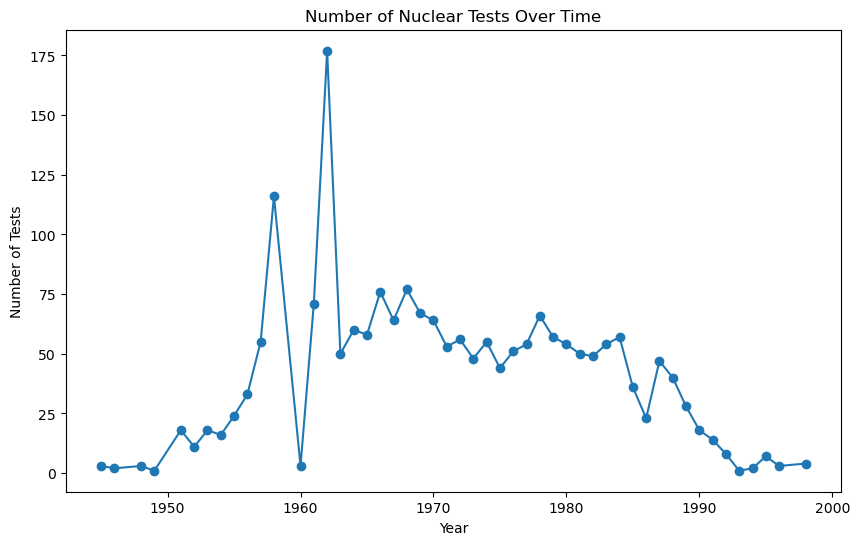

In [56]:
import matplotlib.pyplot as plt

# Count the number of nuclear tests for each year
df_year_counts = df['Date.Year'].value_counts().sort_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df_year_counts.index, df_year_counts.values, marker='o')
plt.title('Number of Nuclear Tests Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Tests')

# Show the plot
plt.show()


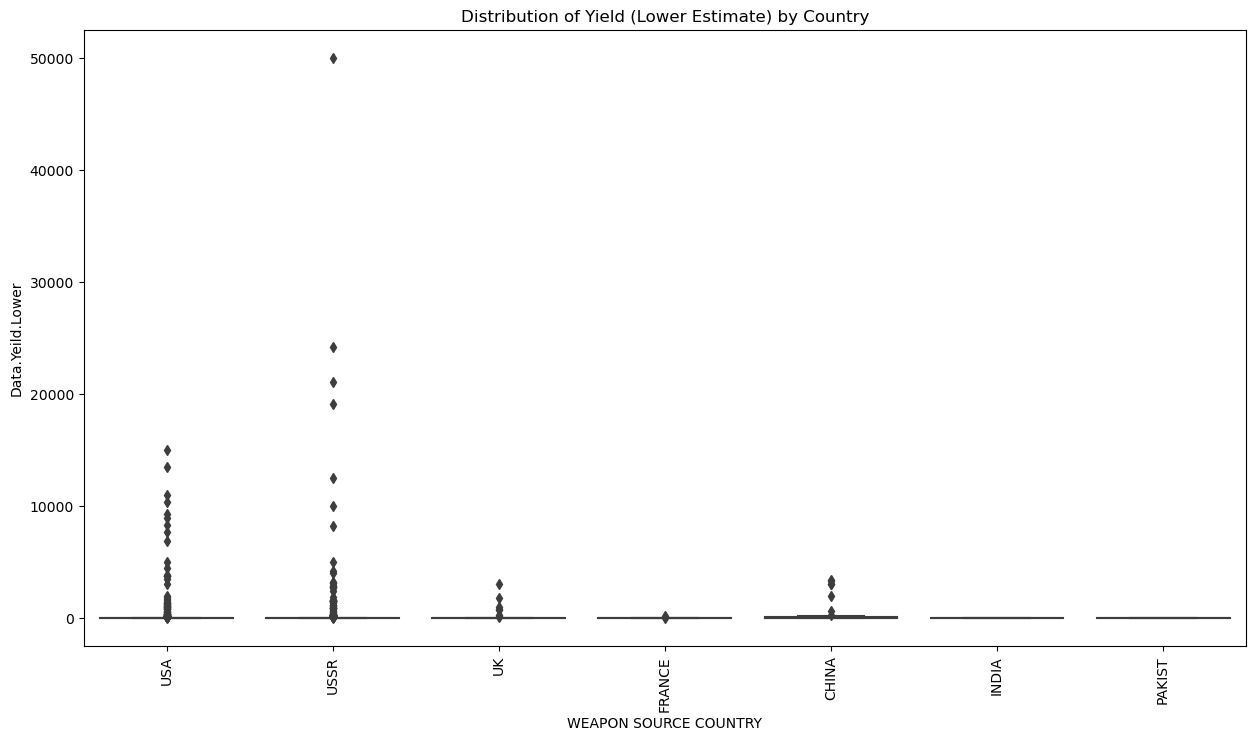

In [57]:
import seaborn as sns

# Create the plot
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='WEAPON SOURCE COUNTRY', y='Data.Yeild.Lower')
plt.title('Distribution of Yield (Lower Estimate) by Country')
plt.xticks(rotation=90)
plt.show()


In [58]:
!pip install dash dash_core_components dash_html_components plotly pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 17.8 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.6
    Uninstalling Werkzeug-2.3.6:
      Successfully uninstalled Werkzeug-2.3.6
  Attempting uninstall: Flask
    Found existing installation: Flask 2.3.2
    Uninstalling Flask-2.3.2:
      Successfully uninstalled Flask-2.3.2


In [59]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Count the number of nuclear tests for each year and country
df_year_country_counts = df.groupby(['Date.Year', 'WEAPON SOURCE COUNTRY']).size().reset_index(name='counts')

# Create the Dash application
app = dash.Dash(__name__)

# Define the layout of the application
app.layout = html.Div([
    html.H1('Nuclear Tests Dashboard'),
    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': country, 'value': country} for country in df['WEAPON SOURCE COUNTRY'].unique()],
        value='USA'
    ),
    dcc.Graph(id='yearly-counts-plot')
])

# Define the callback for the dropdown menu
@app.callback(
    Output('yearly-counts-plot', 'figure'),
    [Input('country-dropdown', 'value')]
)
def update_plot(selected_country):
    filtered_df = df_year_country_counts[df_year_country_counts['WEAPON SOURCE COUNTRY'] == selected_country]
    fig = px.line(filtered_df, x='Date.Year', y='counts', title=f'Number of Tests Over Time ({selected_country})')
    return fig

# Run the application
if __name__ == '__main__':
    app.run_server(debug=True)


In [60]:
import plotly.graph_objects as go

# Create a Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = df['WEAPON SOURCE COUNTRY'].tolist() + df['Data.Type'].tolist(),
    ),
    link = dict(
      source = df['WEAPON SOURCE COUNTRY'].apply(lambda x: df['WEAPON SOURCE COUNTRY'].tolist().index(x)), # indices correspond to labels
      target = df['Data.Type'].apply(lambda x: df['Data.Type'].tolist().index(x) + len(df['WEAPON SOURCE COUNTRY'].unique())),
      value = df['Data.Yeild.Upper']
  ))])

fig.update_layout(title_text="Sankey Diagram of Nuclear Tests", font_size=10)
fig.show()


In [61]:
import plotly.express as px

# Create the scatter plot matrix
fig = px.scatter_matrix(df, dimensions=['Data.Magnitude.Body', 'Data.Magnitude.Surface', 'Location.Cordinates.Depth', 'Data.Yeild.Lower', 'Data.Yeild.Upper'], color='WEAPON SOURCE COUNTRY')

# Show the plot
fig.show()


In [62]:
import plotly.graph_objects as go

# Create the 3D Surface Plot
fig = go.Figure(data=[go.Surface(z=df[['Data.Yeild.Lower', 'Data.Yeild.Upper', 'Location.Cordinates.Depth']].values)])

fig.update_layout(title='3D Surface Plot of Nuclear Test Yields and Depths', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()
